## **AI & Cybersecurity Workshop**
# **Lab 1: Anomaly Detection**

In the first lab we will learn how to detect anomlaly using the KDD Cup 1999 dataset for network intrusion detection. You can be download the file kddcup.data_10_percent.gz via Link:
https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

We will try Anomaly Detection using random forest classification of traffic as normal or attack based on the (bytes sent), dst_bytes (bytes received):

In [ ]:
# Import the datasets saved in google drive
from google.colab import drive
drive.mount('/content/drive')

kddcup.data_10_percent.gz


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Datasets/kddcup.data_10_percent.gz"

column_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv(file_path, header=None, names=column_names)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


# **Feature Exctraction**
Select Features, foucsing on **src_bytes**, **dst_bytes**, and **label** columns, we will get these labels:

In [ ]:
df3 = df[["src_bytes", "dst_bytes", "label"]]
df3.label.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

# **Label Processing**
We will convert the label column into:
*   0 = Normal traffic
*   1 = Attack

In [ ]:
import numpy as np
df3 = df[["src_bytes", "dst_bytes", "label"]].copy() # Make a new DataFrame for processing
labels = df3['label'].str.strip() # remove white space
labels = labels.replace('normal.', 0)
labels = np.where(labels != 0, 1, 0)
df3['label'] = labels
df3.label.unique()

array([0, 1])

# **Train Random Forest model**
Now we can train model using a Random Forest classifier to learn patterns distinguishing normal vs. attack traffic.

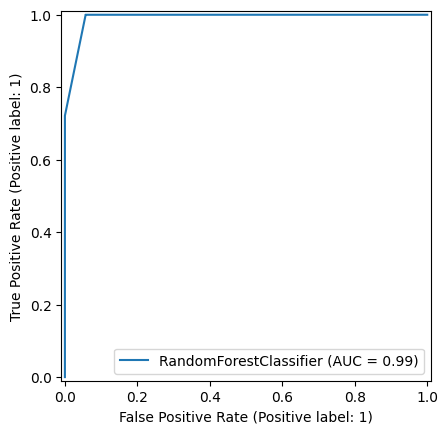

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split

# Split data: 80% of data is used to train the model, 20% is used to test it.
train, test = train_test_split(df3, test_size=0.2)
X_train = train.iloc[:, :-1] # features are everything but last column
y_train = train.iloc[:, -1] # last column is the label
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

clf=RandomForestClassifier()
clf.fit(X_train, y_train)
# ROC curve shows how well the model separates normal traffic from attacks.
RocCurveDisplay.from_estimator(
   clf, X_test, y_test)

plt.show()
#The closer the curve is to the top-left corner, the better the model.

________________________________________________________________________________


# **Lab 2: Spam Detection**

In the second lab we will learn how to detect spam using Ham or Spam dataset. You can download the dataset via Link:
https://media.geeksforgeeks.org/wp-content/uploads/20250320162008521713/spam_ham_dataset.csv

We will try Spam Detection using Tensorflow, one of the most popular deep learning libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

file_path = "/content/drive/MyDrive/Datasets/spam_ham_dataset.csv"
data = pd.read_csv(file_path)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


# **Label Processing**
We will visualize the label distribution:

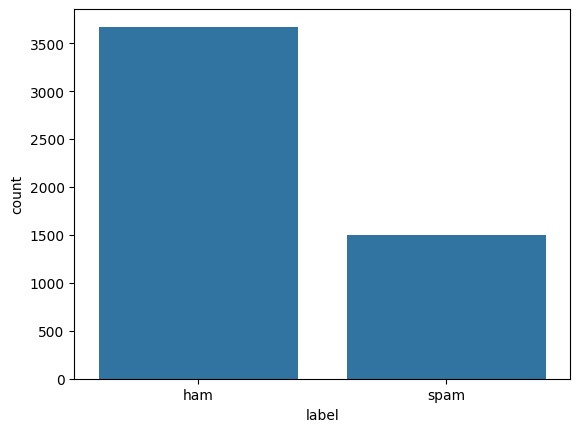

In [ ]:
# Count how many Ham vs Spam emails
sns.countplot(x='label', data=data)
plt.show()

Notice that the dataset needs to be balanced because Ham samples are much more than Spam:

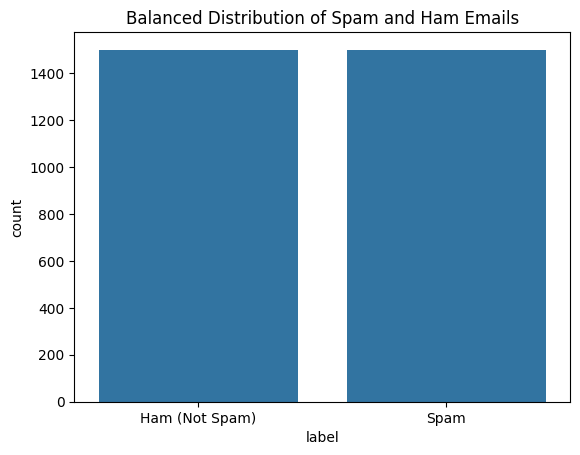

In [ ]:
# -------------------------
# Balancing the labels column
# -------------------------
ham_msg = data[data['label'] == 'ham']
spam_msg = data[data['label'] == 'spam']

# Downsample Ham emails to match the number of Spam emails
ham_msg_balanced = ham_msg.sample(n=len(spam_msg), random_state=42) # You can set the random seed to any number

# Combine balanced data
balanced_data = pd.concat([ham_msg_balanced, spam_msg]).reset_index(drop=True)

# Visualize the balanced dataset
sns.countplot(x='label', data=balanced_data)
plt.title("Balanced Distribution of Spam and Ham Emails")
plt.xticks(ticks=[0, 1], labels=['Ham (Not Spam)', 'Spam'])
plt.show()

# **Preprocessing:** Textual data  needs to be clean before feeding it to model
**Apply Stemming or Lemmatization:** Removing “Subject” word

In [ ]:
balanced_data['text'] = balanced_data['text'].str.replace('Subject', '')
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,: conoco - big cowboy\r\ndarren :\r\ni ' m not...,0
1,2982,ham,: feb 01 prod : sale to teco gas processing\r\...,0
2,2711,ham,": california energy crisis\r\ncalifornia  , s...",0
3,3116,ham,: re : nom / actual volume for april 23 rd\r\n...,0
4,1314,ham,: eastrans nomination changes effective 8 / 2 ...,0


**Apply Punctuations Removal:** Removing (.,?!)

In [ ]:
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0
3,3116,ham,re nom actual volume for april 23 rd\r\nwe ...,0
4,1314,ham,eastrans nomination changes effective 8 2 0...,0


**Apply Stopwords Removal:** Removing (is, the, at)

In [ ]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy darren sure help know else a...,0
1,2982,ham,feb 01 prod sale teco gas processing sale deal...,0
2,2711,ham,california energy crisis california  power cr...,0
3,3116,ham,nom actual volume april 23 rd agree eileen pon...,0
4,1314,ham,eastrans nomination changes effective 8 2 00 p...,0


We can visualize email words of Ham or Spam:

After cleaning which made the text simpler the result will be important words (company, offer, free, win).

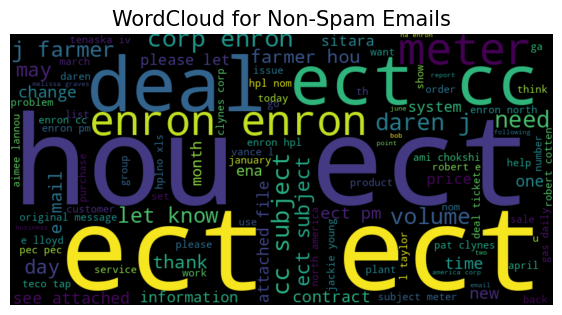

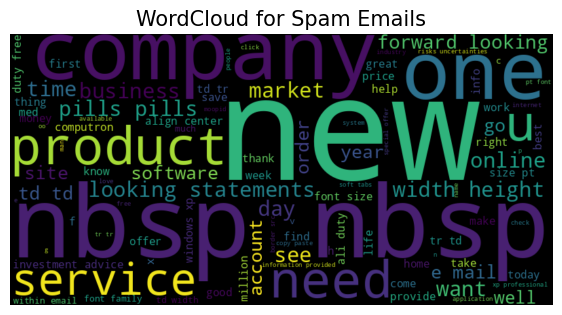

In [ ]:
from wordcloud import WordCloud
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])
    wc = WordCloud(background_color='black', max_words=100, width=800, height=400).generate(email_corpus)
    plt.figure(figsize=(7, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} Emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['label'] == 'ham'], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['label'] == 'spam'], typ='Spam')

# **Data splits:** split data into test and training, apply tokenization and padding
Our data is english words, it must be converted to numbers to become trainable.

*   **Tokenization**: Converts each word into a unique integer.
*   **Padding**: Ensures that all text sequences have the same length, making them compatible with the model.



In [ ]:
# Split data: 80% of data is used to train the model, 20% is used to test it.
train_X, test_X, train_Y, test_Y = train_test_split(
    balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42
)

# Tokenization → each word becomes a number
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

max_len = 100  # Maximum sequence length
# Padding → all emails are made the same length
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

train_Y = (train_Y == 'spam').astype(int)
test_Y = (test_Y == 'spam').astype(int)

# **Build Deep learning Model:** add sequential layers
*   Embedding Layer: Learns vector representations of words.
*   LSTM Layer: Captures patterns in sequences.
*   Fully Connected Layer: Extracts relevant features.
*   Output Layer: Predicts whether an email is spam or not.



In [ ]:
# Model is built with layers of “neurons”. Each number means how many neurons (units) that layer has.
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32), # 32 neurons so each word gets a 32-character ID card describing it
    tf.keras.layers.LSTM(16), # 16 neurons for pattern recognition
    tf.keras.layers.Dense(32, activation='relu'), # 32 neurons for learning features like “email contains money words”
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1 Output layer (0 = Ham, 1 = Spam)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

# **Training the model:**
Now we can using a Tensorflow to learn patterns distinguishing Ham vs. Spam and evaluate the model on the test data to measure its performance.

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:789: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5330 - loss: 0.6917 - val_accuracy: 0.7950 - val_loss: 0.5949 - learning_rate: 0.0010
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9153 - loss: 0.3819 - val_accuracy: 0.9550 - val_loss: 0.1635 - learning_rate: 0.0010
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9567 - loss: 0.1756 - val_accuracy: 0.9417 - val_loss: 0.3973 - learning_rate: 0.0010
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9580 - loss: 0.2313 - val_accuracy: 0.9483 - val_loss: 0.1606 - learning_rate: 0.0010
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9778 - loss: 0.1018 - val_accuracy: 0.9650 - val_loss: 0.1195 - learning_rate: 0.0010
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9809 - loss: 0.0876 - val_accuracy: 0.9483 - val_loss: 0.2211 - learning_rate: 0.0010
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9771 - loss: 0.1025 - val_accuracy: 0.97

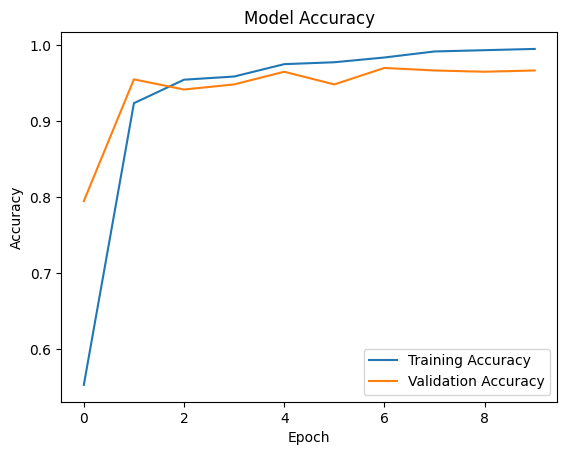

In [ ]:
# Stops training early if the model is no longer improving to prevent overfitting
es = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
# Lowers the learning rate if the model stops improving
lr = ReduceLROnPlateau(patience=2, monitor='val_loss', factor=0.5, verbose=0)

history = model.fit(
    train_sequences, train_Y,
    validation_data=(test_sequences, test_Y),
    epochs=20, # how many times the model will encounter and learn from the full dataset
    batch_size=32, # Instead of waiting to process all 10,000 emails at once, we break them into 32-sized chunks.
    callbacks=[lr, es]
)

test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

_______________________________________________________________________________
# **Lab 3: Malware Analysis**
In the third lab we will learn how to analyze Malware using SOREL dataset that comprise 20 million Windows PE malware binary.

Note: Do not download the dataset directly on you device, use a Virtual Machine or coding environment! Malware detection needs a dataset with normal files benign and malwares and it is dangrouse to download. I only downloaded one malware file bytes (not the actual malware) in my drive not on my device!

We will try Malware Analysis converting binary to image like Convulotional Neural Networks (CNN) models:

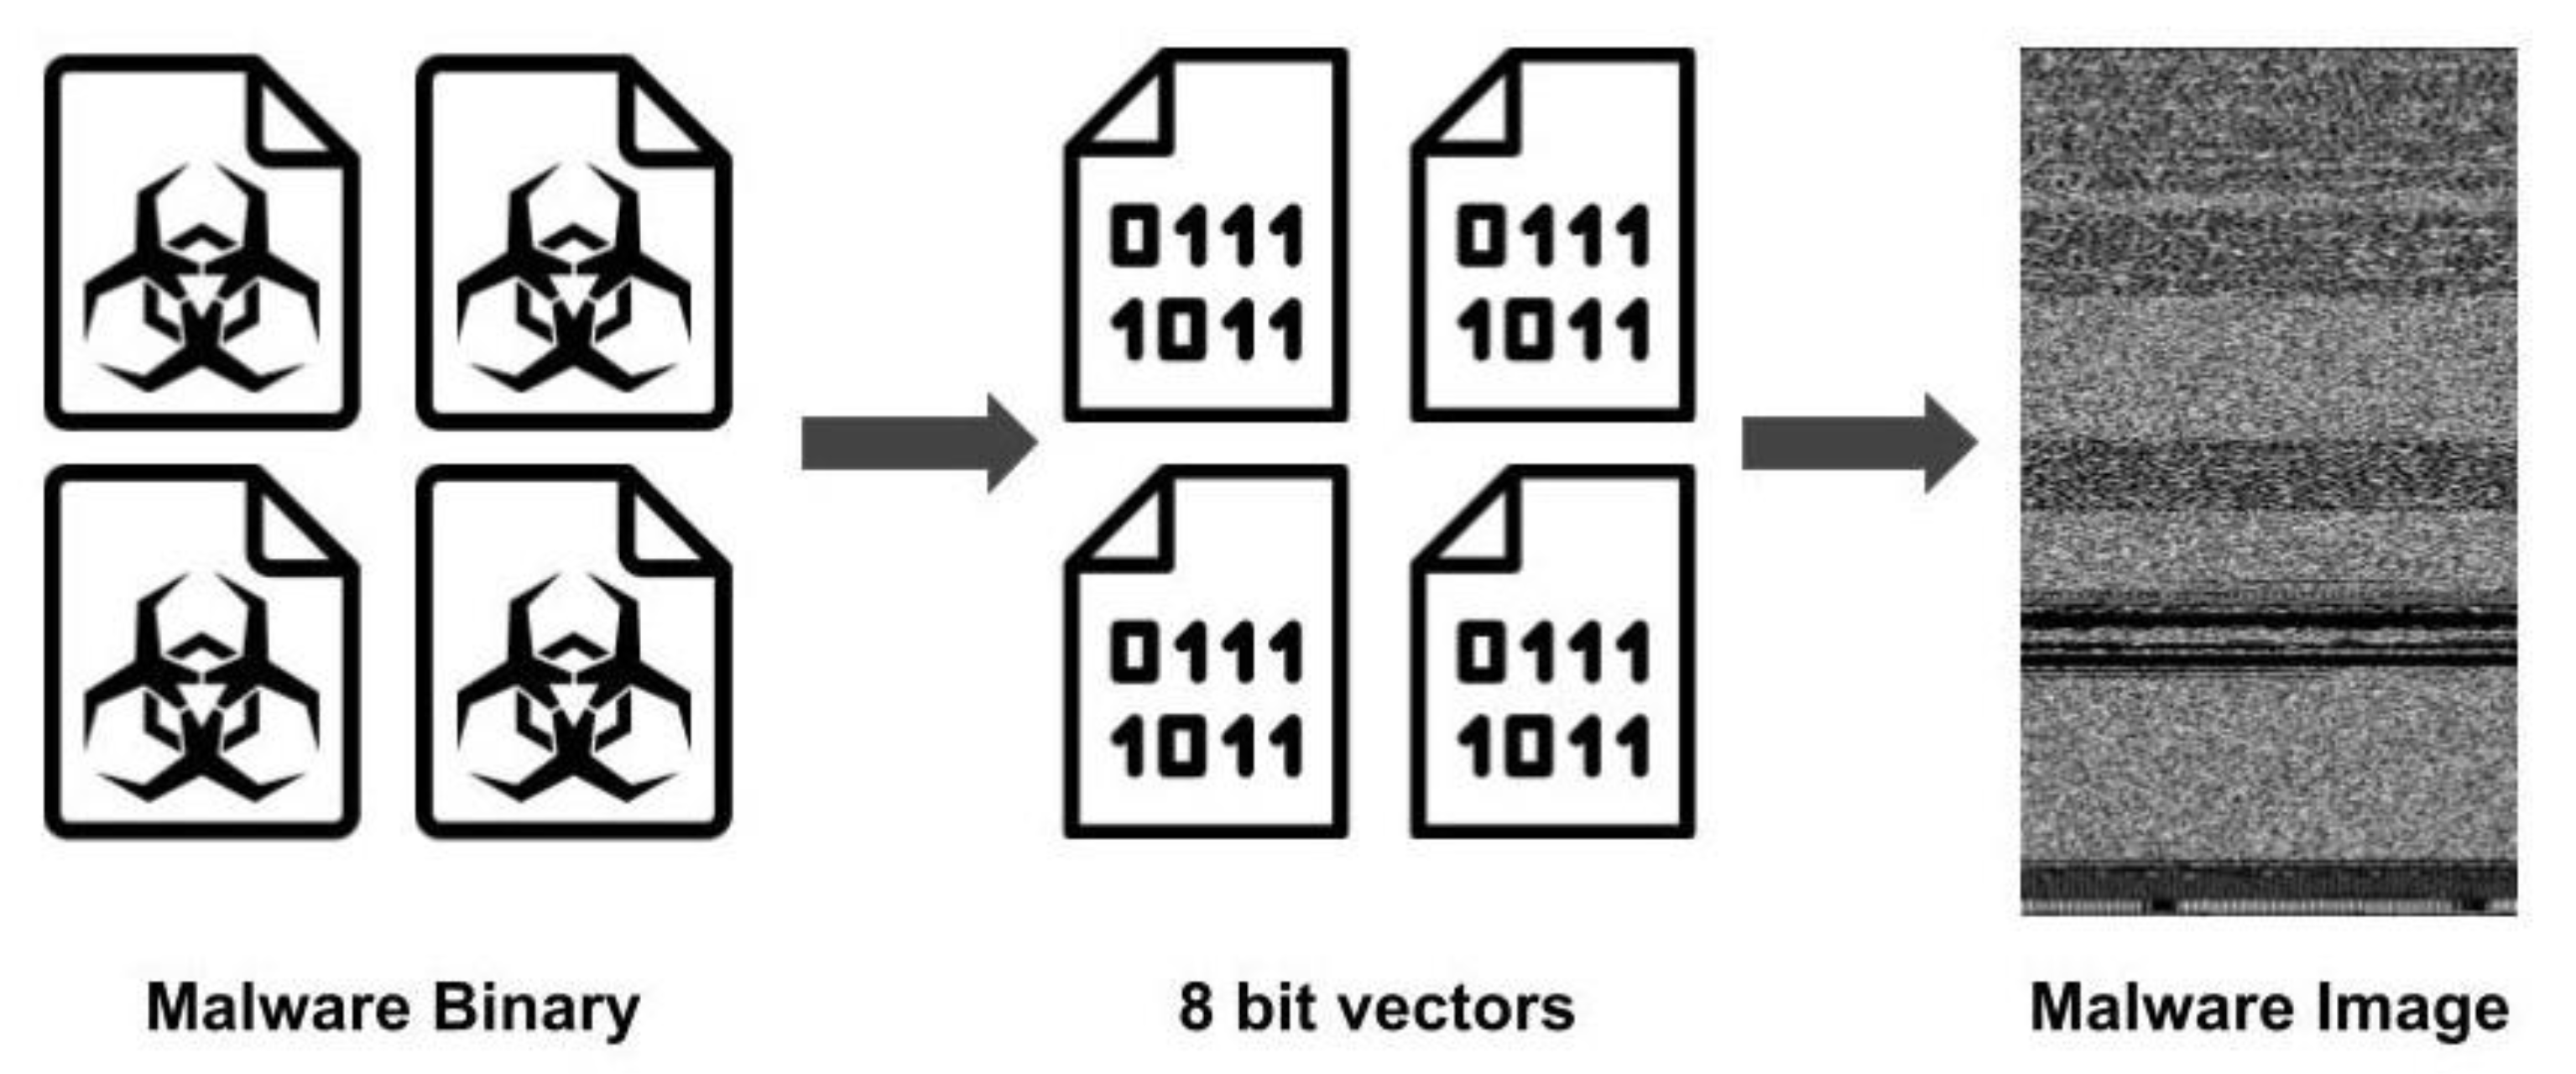

In [ ]:
import os
import math
import requests
import io
from pathlib import Path
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd

# IMPORTANT: Do not execute files. Read files as bytes only.

WORKDIR = "/content/drive/MyDrive/Datasets/safe_malware_analysis"
os.makedirs(WORKDIR, exist_ok=True)

# -------------------------
# Example: download one Sorel binary as bytes
# -------------------------
url = "http://sorel-20m.s3.amazonaws.com/09-DEC-2020/binaries/047316c8118e6e4d088c4aaebab34a031e62ecc42ecefc4cf0c3d4f9eb91dc30"

example_sha = url.split("/")[-1]
example_file = Path(WORKDIR) / example_sha

if not example_file.exists():
    print("Downloading one example binary (read bytes only)...")
    r = requests.get(url, stream=True, timeout=60)
    r.raise_for_status()
    # save raw bytes
    with open(example_file, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192): # Instead of downloading the whole file at once, Python reads it in small pieces (chunks)
            if chunk:
                f.write(chunk)
    print("Saved:", example_file)
else:
    print("Example binary already saved:", example_file)

Saved: /content/drive/MyDrive/Datasets/safe_malware_analysis/047316c8118e6e4d088c4aaebab34a031e62ecc42ecefc4cf0c3d4f9eb91dc30


# **Binary -> image conversion function**
*We read the malware binary as a byte = 8 bits*

With 8 bits, you can represent numbers from 0 → 255 (that’s $2^8$ = 256
possible values).

Example:

* 00000000 → 0

* 11111111 → 255

* 01111111 → 127

*In a **2D grayscale image**:*

Each pixel = one number that represents brightness.

Example:

* Byte 0 → pure black pixel.

* Byte 255 → pure white pixel.

* Byte 127 → medium gray.

*An **image** is a 2D rectangle with height and width:*

We reshape a 1D bytes row [34, 198, 5, 127, 255, 12, 0, 89]

into 2D bytes RowsxColumns:

Row 1 → [34, 198, 5, 127]

Row 2 → [255, 12, 0, 89]

***Padding** bytes with zeros:*

Since the width is fixed 256, the change in height calculated with this method will result pixel gaps:

$$ \text{height} = \lceil \frac{\text{number of bytes}}{\text{width}} \rceil $$

Example:

* File has 1027 bytes

* Width = 256

* Height = ceil(1027 / 256) = ceil(4.0117) = 5 rows

* Total pixels needed = 5 × 256 = 1280 pixels

* Missing bytes = 1280 − 1027 = 253 bytes

We add zeros (black) at the end so the 1D byte array becomes exactly the size we need to reshape into a rectangle.

Saved preview PNG: /content/drive/MyDrive/Datasets/safe_malware_analysis/047316c8118e6e4d088c4aaebab34a031e62ecc42ecefc4cf0c3d4f9eb91dc30.png


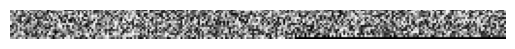

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def binary_to_image_bytes(filepath, width=256, pad_value=0):
    """
    A Malware binary is just a bunch of bytes (numbers 0–255), We can rearranges
    those bytes into a 2D grayscale image as numpy uint8 array:
    - Width: pixel width for the image set to 256
    - Height = depends on the number of bytes in the file ceil(num_bytes / width)
    - pad_value: value to use for padding the last row if needed (0..255)
    Returns: HxW numpy array dtype=uint8 a a rectangle of the 2D image
    """
    with open(filepath, "rb") as f:
        b = f.read()
    arr = np.frombuffer(b, dtype=np.uint8)  # values 0..255
    if arr.size == 0:
        # Avoid empty files — return 1xwidth row of pad_value
        h = 1
        img = np.full((h, width), pad_value, dtype=np.uint8)
        return img
    # height = ceil(total_bytes / width)
    h = math.ceil(arr.size / width)
    target_size = h * width
    if arr.size < target_size:
        # pad with zeros at the end
        pad_len = target_size - arr.size
        arr = np.pad(arr, (0, pad_len), constant_values=pad_value)
    # Reshape 1D bytes array become 2D image array
    img = arr.reshape((h, width))
    return img

# Utility: save image for inspection (PIL)
def save_image_from_binary(filepath, out_png_path, width=256):
    img_arr = binary_to_image_bytes(filepath, width=width)
    img = Image.fromarray(img_arr)  # mode 'L'
    img.save(out_png_path)

# Quick test: convert downloaded example to PNG
preview_png = Path(WORKDIR) / f"{example_sha}.png"
save_image_from_binary(example_file, preview_png, width=256)
print("Saved preview PNG:", preview_png)
img = Image.open(preview_png)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()